# TP3 (Filtrage spatial) -Traitement d'images

<h3>BENZAIED Saifeddine</h3>
<h3>BOUNEB Rayen</h3>
<h3>CHAOUANI Nesrine</h3>

<h5><i>RT4 groupe 1</h5>

In [1]:
from skimage import io, color
from skimage.util import random_noise
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
from skimage.restoration import denoise_nl_means, estimate_sigma

<h2>Partie 1</h2>

In [2]:
# 1. Charger l'image Lena.png dans une matrice en niveaux de gris (imGray)
image_path = 'Lena.png'
img = io.imread(image_path)
imGray = color.rgb2gray(img)

print(f"Taille de l'image : {img.shape}")

if imGray.dtype == np.float64 or imGray.dtype == np.float32:
    imGray = (imGray * 255).astype(np.uint8)

Taille de l'image : (512, 512)


C:\Users\BENZAI~1\AppData\Local\Temp/ipykernel_13444/940136418.py:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  imGray = color.rgb2gray(img)


In [3]:
# 2. Appliquer un bruit blanc Gaussien de variance σ^2 = 0.01 et stocker le résultat dans une matrice imGauss
sigma_square = 0.01
imGauss = random_noise(imGray, mode='gaussian', var=sigma_square)

if imGauss.dtype == np.float64 or imGauss.dtype == np.float32:
    imGauss = (imGauss * 255).astype(np.uint8)

In [4]:
# 3. Appliquer sur l'image imGray un bruit sel et poivre avec un pourcentage p = 0.05 de pixels modifiés et stocker le résultat dans une matrice imSP
p = 0.05
imSP = random_noise(imGray, mode='s&p', amount=p)

if imSP.dtype == np.float64 or imSP.dtype == np.float32:
    imSP = (imSP * 255).astype(np.uint8)

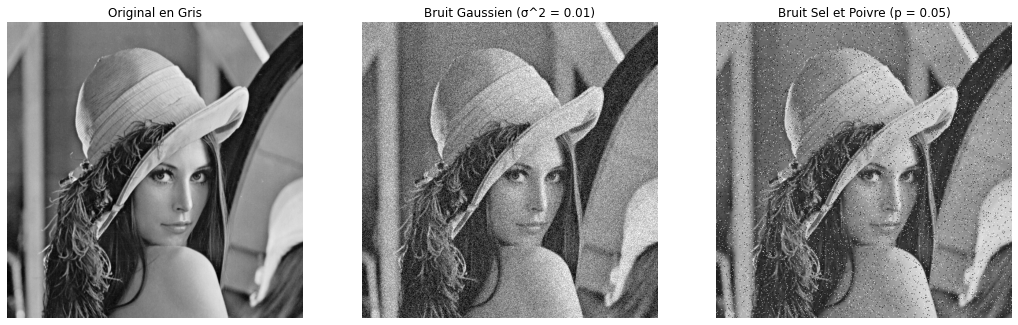

In [5]:
# 4. Afficher sur une même figure les images imGray, imGauss, et imSP. Comparer les effets des deux dégradations et commenter
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(imGray, cmap='gray')
axes[0].set_title('Original en Gris')
axes[0].axis('off')

axes[1].imshow(imGauss, cmap='gray')
axes[1].set_title(f'Bruit Gaussien (σ^2 = {sigma_square})')
axes[1].axis('off')

axes[2].imshow(imSP, cmap='gray')
axes[2].set_title(f'Bruit Sel et Poivre (p = {p})')
axes[2].axis('off')

plt.show()

Le bruit gaussien est une forme de bruit aléatoire qui affecte les images numériques. Il se manifeste par l'ajout de perturbations aléatoires de faible amplitude, suivant une distribution gaussienne. Concrètement, cela se traduit par l'incorporation de pixels dont les valeurs sont légèrement décalées par rapport aux valeurs originales de l'image, créant ainsi une sorte de flou ou de variation douce dans l'image.

Le bruit de type "sel et poivre" est une autre forme courante de bruit qui altère les images numériques. Contrairement au bruit gaussien, il se caractérise par l'ajout aléatoire de pixels noirs et blancs extrêmes dans l'image. Ces pixels "sel" (blancs) et "poivre" (noirs) sont disséminés de manière aléatoire à travers l'image, créant des points isolés de haute intensité qui dégradent la qualité visuelle de l'image.

<h2>Partie 2</h2>

In [6]:
sigma_square = 0.005
imGauss = random_noise(imGray, mode='gaussian', var=sigma_square)

if imGauss.dtype == np.float64 or imGauss.dtype == np.float32:
    imGauss = (imGauss * 255).astype(np.uint8)
    
p = 0.05
imSP = random_noise(imGray, mode='s&p', amount=p)

if imSP.dtype == np.float64 or imSP.dtype == np.float32:
    imSP = (imSP * 255).astype(np.uint8)

In [7]:
# Fonction pour calculer MSE
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

# Fonction pour calculer PSNR
def psnr(imageA, imageB):
    mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse_value))


<b>Filtrage moyenneur

MSE (taille de noyau (3, 3)): 64.15011978149414
PSNR (taille de noyau (3, 3)): 30.05882889238906


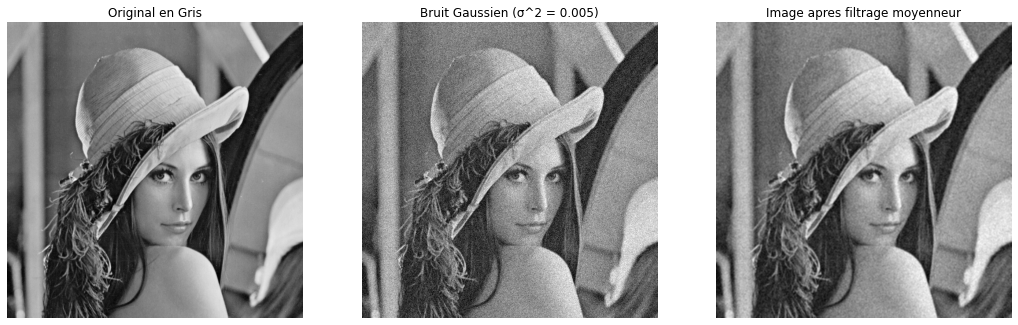

******************************************************************************************
MSE (taille de noyau (5, 5)): 84.55865478515625
PSNR (taille de noyau (5, 5)): 28.859222955566043


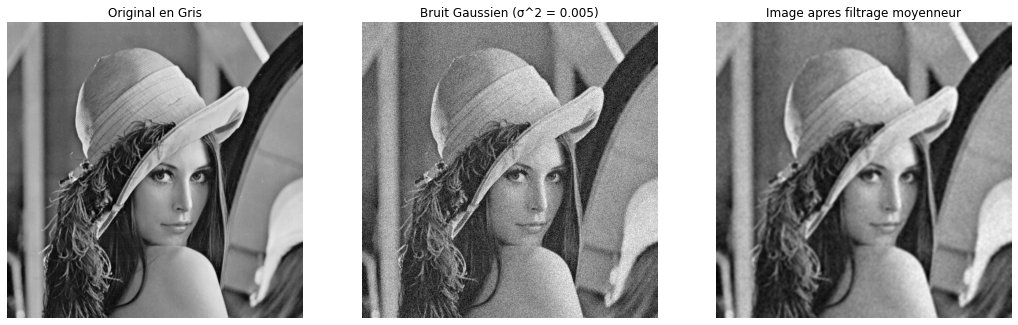

******************************************************************************************
MSE (taille de noyau (7, 7)): 122.38114929199219
PSNR (taille de noyau (7, 7)): 27.253658334909655


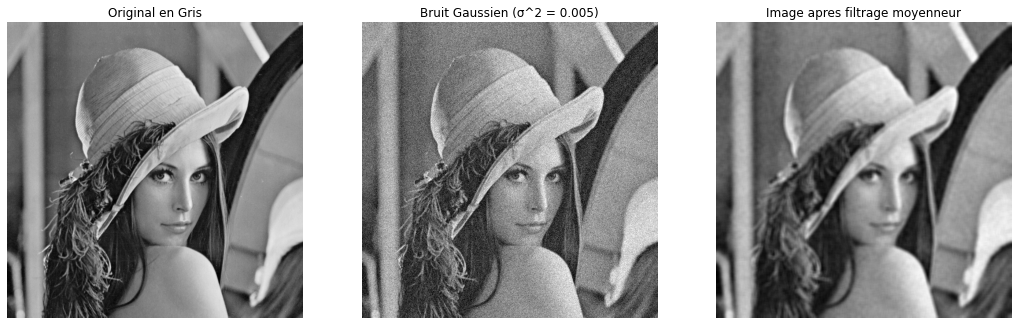

******************************************************************************************


In [8]:
# Exemple d'application d'un filtre moyenneur sur imGauss
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
for size in kernel_sizes:
    filtered_image = cv2.blur(imGauss, size)
    # Évaluation avec PSNR et MSE
    print(f"MSE (taille de noyau {size}):", mse(imGray, filtered_image))
    print(f"PSNR (taille de noyau {size}):", psnr(imGray, filtered_image))
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(imGray, cmap='gray')
    axes[0].set_title('Original en Gris')
    axes[0].axis('off')
    
    axes[1].imshow(imGauss, cmap='gray')
    axes[1].set_title(f'Bruit Gaussien (σ^2 = {sigma_square})')
    axes[1].axis('off')

    axes[2].imshow(filtered_image, cmap='gray')
    axes[2].set_title(f'Image apres filtrage moyenneur')
    axes[2].axis('off')
    
    plt.show()
    
    print("******************************************************************************************")


Le filtre moyen fonctionne en remplaçant la valeur de chaque pixel dans l'image par la moyenne des valeurs des pixels voisins, généralement dans une fenêtre carrée ou rectangulaire définie.

Il est observé que lorsque la taille du noyau du filtre moyen est agrandie, le Mean Squared Error (MSE) augmente tandis que le Peak Signal-to-Noise Ratio (PSNR) diminue. Cela se traduit par une détérioration de la qualité de l'image, qui devient de plus en plus floue. En augmentant la taille du noyau, le filtre moyen incorpore davantage de pixels environnants dans le calcul de la moyenne, ce qui entraîne une perte de détails et une plus grande propagation du flou sur toute l'image. Par conséquent, bien que le filtre moyen puisse réduire le bruit, une augmentation excessive de la taille du noyau peut compromettre la netteté et la clarté de l'image résultante.

<b>Filtrage gaussian

MSE (taille de noyau (3, 3)): 63.4269905090332
PSNR (taille de noyau (3, 3)): 30.108062554349303


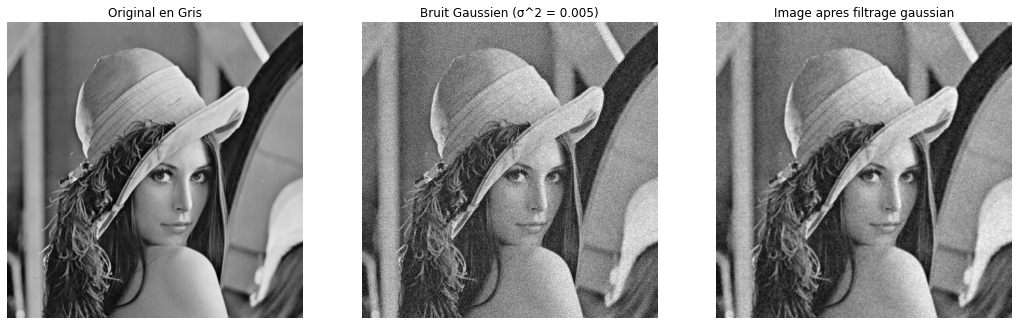

******************************************************************************************
MSE (taille de noyau (5, 5)): 58.00397491455078
PSNR (taille de noyau (5, 5)): 30.496226048169653


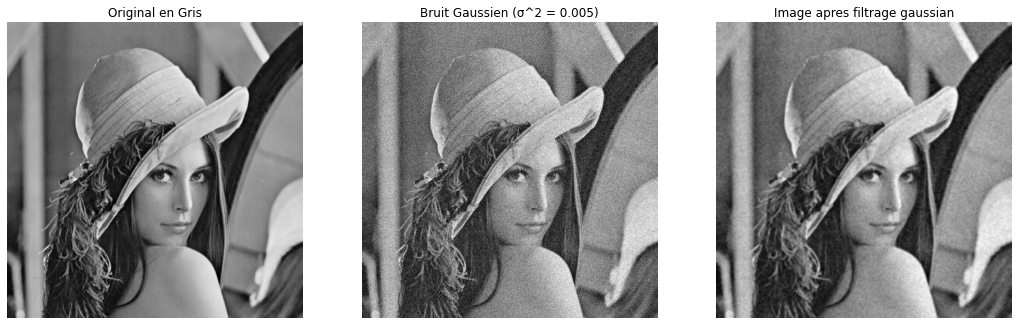

******************************************************************************************
MSE (taille de noyau (7, 7)): 70.26299285888672
PSNR (taille de noyau (7, 7)): 29.663537162030075


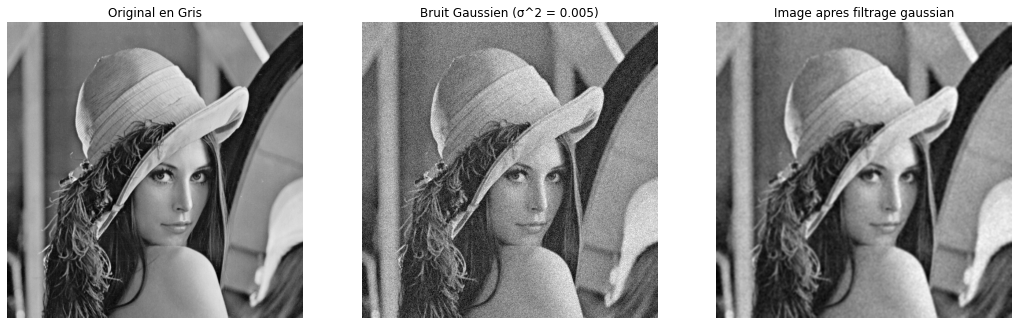

******************************************************************************************


In [9]:
# Exemple d'application d'un filtre gaussian sur imGauss
kernel_sizes = [(3, 3), (5, 5), (7, 7)]
for size in kernel_sizes:
    filtered_image = cv2.GaussianBlur(imGauss, size, 0)
    # Évaluation avec PSNR et MSE
    print(f"MSE (taille de noyau {size}):", mse(imGray, filtered_image))
    print(f"PSNR (taille de noyau {size}):", psnr(imGray, filtered_image))
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(imGray, cmap='gray')
    axes[0].set_title('Original en Gris')
    axes[0].axis('off')
    
    axes[1].imshow(imGauss, cmap='gray')
    axes[1].set_title(f'Bruit Gaussien (σ^2 = {sigma_square})')
    axes[1].axis('off')

    axes[2].imshow(filtered_image, cmap='gray')
    axes[2].set_title(f'Image apres filtrage gaussian')
    axes[2].axis('off')
    
    plt.show()
    
    print("******************************************************************************************")


Le filtre gaussien est un filtre passe-bas qui peut lisser le bruit tout en préservant les contours et les détails d'une image. La largeur du filtre gaussien (son écart-type) peut être ajustée pour contrôler la quantité de lissage appliquée à l'image.

Il est remarquable que la taille du noyau du filtre gaussien influe sur ses performances. Dans notre exemple, en augmentant la taille du noyau de 3x3 à 5x5, les résultats s'améliorent notablement. Cependant, lorsque la taille du noyau est encore agrandie, par exemple de 5x5 à 7x7, la qualité de l'image commence à se détériorer. Cela s'explique par le fait que le filtre gaussien, en élargissant la zone de calcul de la moyenne pondérée, réussit à réduire efficacement le bruit dans l'image pour des tailles de noyau plus grandes. Cependant, une augmentation excessive de la taille du noyau peut conduire à une perte excessive de détails et à une propagation accrue du flou, ce qui compromet finalement la netteté et la clarté de l'image résultante.

Lors de la restauration d'une image corrompue par du bruit gaussien additif avec une variance connue, un filtre efficace pour la restauration de l'image est le filtre gaussien, mieux que le filtre moyenneur.

<b>Filtrage médian

MSE (taille de noyau 3): 22.038009643554688
PSNR (taille de noyau 3): 34.69907992097151


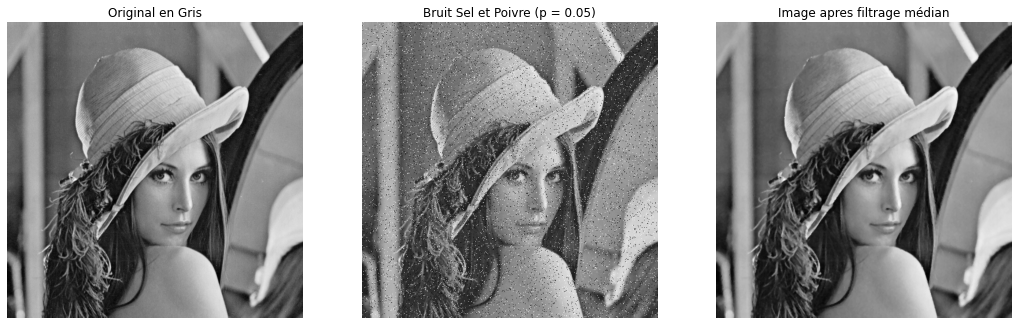

******************************************************************************************
MSE (taille de noyau 5): 50.31394577026367
PSNR (taille de noyau 5): 31.113919835330833


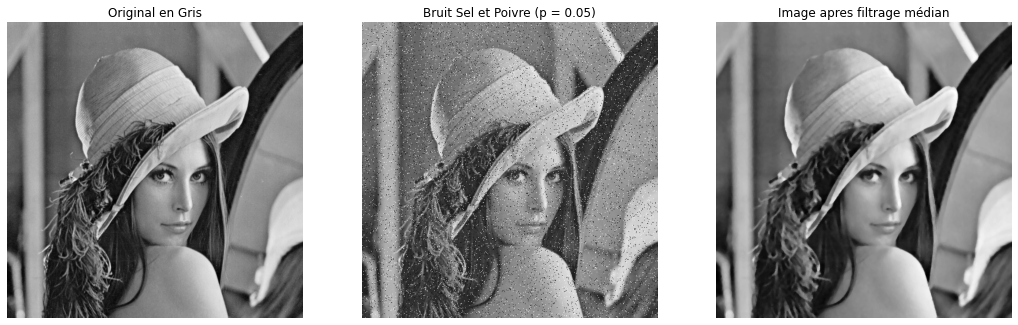

******************************************************************************************
MSE (taille de noyau 7): 80.43252182006836
PSNR (taille de noyau 7): 29.076486754132777


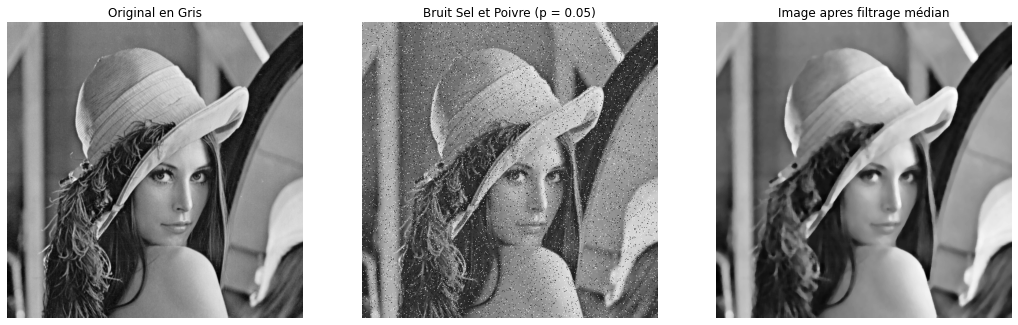

******************************************************************************************


In [10]:
# Exemple d'application d'un filtre médian sur imSP
ksize_values = [3, 5, 7]
for size in ksize_values:
    filtered_image = cv2.medianBlur(imSP, size)
    # Évaluation avec PSNR et MSE
    print(f"MSE (taille de noyau {size}):", mse(imGray, filtered_image))
    print(f"PSNR (taille de noyau {size}):", psnr(imGray, filtered_image))
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].imshow(imGray, cmap='gray')
    axes[0].set_title('Original en Gris')
    axes[0].axis('off')
    
    axes[1].imshow(imSP, cmap='gray')
    axes[1].set_title(f'Bruit Sel et Poivre (p = {p})')
    axes[1].axis('off')

    axes[2].imshow(filtered_image, cmap='gray')
    axes[2].set_title(f'Image apres filtrage médian')
    axes[2].axis('off')
    
    plt.show()
    
    print("******************************************************************************************")
    


Lors de la réparation d'une image altérée par du bruit de type "sel et poivre", caractérisé par l'ajout aléatoire de pixels noirs et blancs à travers l'image, un filtre efficace pour restaurer l'image est le filtre médian.

Ce filtre remplace chaque pixel de l'image par la valeur médiane des pixels environnants dans une zone de noyau spécifiée. Il se révèle particulièrement performant pour éliminer le bruit de type "sel et poivre", car la médiane d'un ensemble de pixels est moins sensible aux valeurs extrêmes que la moyenne.

L'effet de la taille du noyau sur un filtre médian est crucial. À mesure que la taille du noyau augmente, le filtre médian devient plus efficace pour éliminer le bruit "sel et poivre", ce qui généralement améliore la qualité de l'image. Cette amélioration se traduit par une réduction du Mean Squared Error (MSE) et une augmentation du Peak Signal-to-Noise Ratio (PSNR). Cependant, il est primordial de maintenir un équilibre, car une taille de noyau trop grande peut entraîner une perte de détails et une certaine lissage de l'image.

<h2>Partie 3</h2>

C:\Users\BENZAI~1\AppData\Local\Temp/ipykernel_13444/4267980393.py:5: UserWarning: Image dtype is not float. By default denoise_nl_means will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.19 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  nlm_img = denoise_nl_means(imGauss, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)


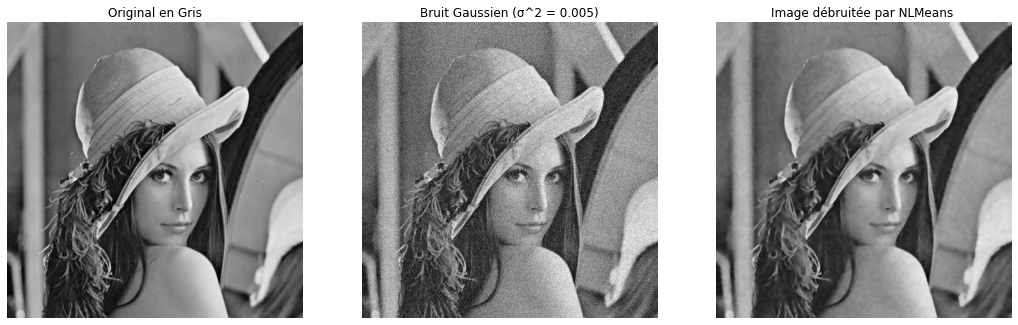

MSE :  43.11474103736642
PSNR :  31.78454578952202
*******************************************************************************************************


In [11]:
# Estimation de la déviation standard du bruit dans l'image avec bruit gaussien
sigma_est = np.mean(estimate_sigma(imGauss, multichannel=True))

# Application du filtre NLMeans
nlm_img = denoise_nl_means(imGauss, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(imGray, cmap='gray')
axes[0].set_title('Original en Gris')
axes[0].axis('off')

axes[1].imshow(imGauss, cmap='gray')
axes[1].set_title(f'Bruit Gaussien (σ^2 = {sigma_square})')
axes[1].axis('off')
    
axes[2].imshow(nlm_img, cmap='gray')
axes[2].set_title('Image débruitée par NLMeans ')
axes[2].axis('off')

plt.show()

# Évaluation avec PSNR et MSE
print(f"MSE : ", mse(imGray, nlm_img))
print(f"PSNR : ", psnr(imGray, nlm_img))
print("*******************************************************************************************************")

Le filtre Non-Local Means (NLMeans) se distingue par son approche unique pour réduire le bruit dans les images, se basant sur l'idée que des pixels similaires peuvent se trouver partout dans l'image, pas seulement dans des zones adjacentes. Cette méthode remplace la valeur d'un pixel par une moyenne des valeurs de pixels similaires, permettant ainsi un débruitage efficace tout en préservant les détails fins de l'image.

La performance du filtre NLMeans dépend fortement du choix des paramètres, notamment la taille des patchs, la distance de recherche, et le paramètre de filtrage \(h\). Ces paramètres doivent être ajustés en fonction de la variance du bruit dans l'image, avec des ajustements spécifiques recommandés pour différents niveaux de bruit. Un ajustement précis de ces paramètres est essentiel pour équilibrer la réduction du bruit et la préservation des détails.

En résumé, le NLMeans offre une méthode avancée pour le débruitage d'images qui préserve mieux les structures de l'image par rapport aux approches traditionnelles. Le succès de son application repose sur une sélection minutieuse des paramètres, adaptée aux caractéristiques spécifiques de chaque image.